

# Project: Investigate a Dataset - No Show Appiontment Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Dataset Description 

>* **PatientId** Indicates the patient name.
>* **AppointmentID** Indicates appoint number.
>* **Gender** Indicates the patient's gender.
>* **ScheduledDay** Tells us on what day the patient set up their appointment.
>* **AppointmentDay** Indicates what day the patient called to book their appointment.
>* **Age** Indicates the age of patient.
>* **Neighborhood** Indicates the location of the hospital.
>* **Scholarship** Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>* **Hipertension** Indicates whether or not the patient is sick with Hypertension.
>* **Diabetes** Indicates whether or not the patient is sick with Diabetes.
>* **Alcoholism** Indicates whether or not the patient is Alcoholism.
>* **Handcap** Indicates whether or not the patient is from people of determination.
>* **SMS_received** Indicates whether or not the patient has received a reminder text message.
>* **No-show** ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

> What is the overall percentage of attendance?
>
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>
> Which day is most day has patients have showed up?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Checking how many samples and colums
print(df.shape)

(110527, 14)


Number of samples in our dataset are 110527 - Number of columns in our dataset are 14

In [5]:
# Checking if there is any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values in our dataset

In [6]:
# Checking how many duplicated values
df.duplicated().sum()

0

No duplicated rows in our dataset

In [7]:
# Checking data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# Checking mean, standerd deviation and the 5 values. 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Checking the number of unique values of the variable
df['PatientId'].nunique()

62299

Some patients have more than an appointment as 62299 are unique values

In [10]:
# Checking if there are some patients have booked more than an appointment
df['PatientId'].duplicated().sum()

48228

Number of duplicated IDs is 48228

In [11]:
# Checking if there is the same patient with the same status of showing.
df.duplicated(['PatientId', 'No-show']).sum()

38710

Number of same patient with same status is 38710 so we will drop them.

In [12]:
# Checking the number of unique values of the variable
df['AppointmentID'].unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448])

No use for this column in our analysis so we will drop it.

In [13]:
# Checking the values of the variable
df['Gender'].unique()

array(['F', 'M'], dtype=object)

No use for this column in our analysis so we will drop it.

In [14]:
# Checking the values of the variable
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

All appointments timing are set as 00:00:00 so we can't analyse them but we can analyse dates and check if week day would effect attendance.

In [15]:
# Checking the values of the variable
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Looks like there is a mistake in age column as age can't be -1 so it needs to be cleaned.

In [16]:
# Checking rows with age column entry mistake 
Age_entry_mistake = df.query('Age == "-1"')
Age_entry_mistake

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
# Checking the values of the variable
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)


### Data Cleaning


In [18]:
# drop rows which the same patient with the same status of showing up
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)
df.shape

(71817, 14)

Removing rows of duplicated values of the same patients with the same status

In [19]:
# Drop colums which won't be useful
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis=1, inplace=True)
df.head(2)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Removing unnecessary columns of our dataset

In [20]:
# Rename columns header 
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)
df.head(2)

,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Cleaning columns label with removing spaces, using lower case letters, underscores and correcting spelling

In [21]:
# Changing column value format from string to datatime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['weekday']=df['appointmentday'].dt.dayofweek
df.head(2)

,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4


Converting data type from string to datetime and creating new column of weekday to analyse if weekdays effect the attendance.

In [22]:
# Drop row has mistakes
df.drop(index=99832, axis=0, inplace=True)

Removing row has incorrect value for age -1

In [23]:
Age_entry_mistake = df.query('age == "-1"')
Age_entry_mistake

,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday


Double checking incorrect age value in rows

In [24]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

Double checking age column values after cleaning

In [25]:
df.no_show.value_counts()

No     54153
Yes    17663
Name: no_show, dtype: int64

In [26]:
# Changing column value from Yes / No to 1 / 0
df.no_show = np.where(df.no_show == "Yes", 1, 0)
df.no_show.value_counts()

0    54153
1    17663
Name: no_show, dtype: int64

Changing no_show column values to be easier for analysis

referance https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

<a id='eda'></a>
## Exploratory Data Analysis



## General View

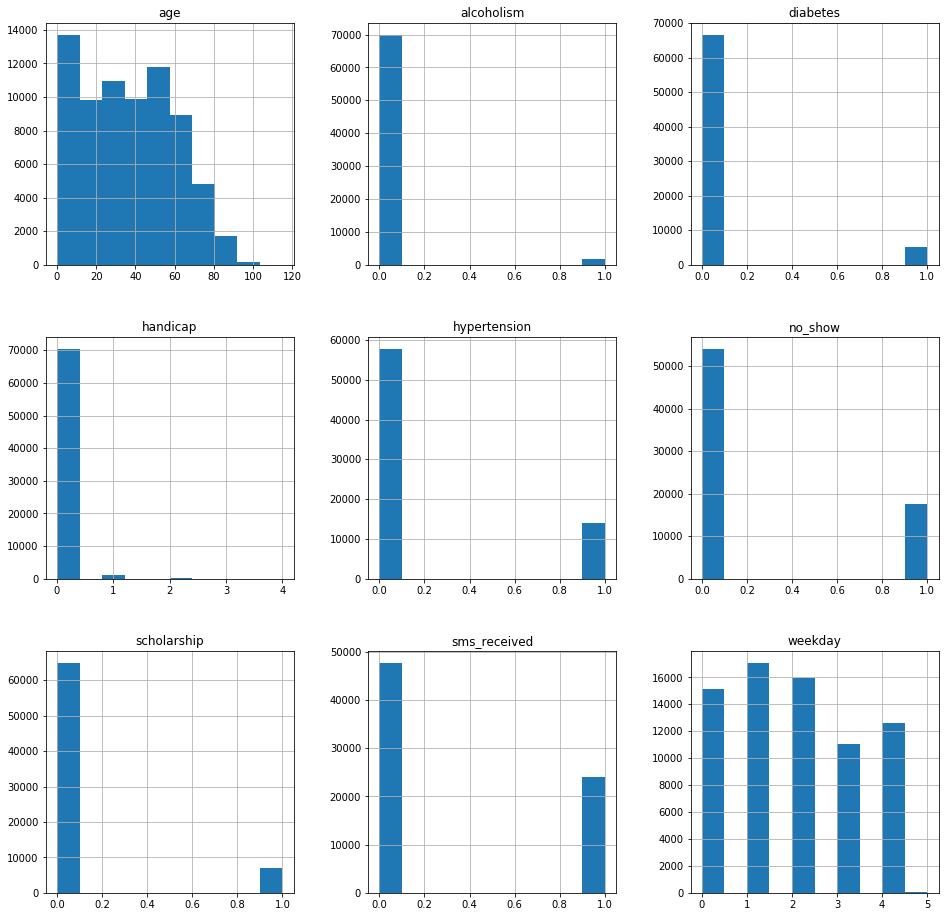

In [27]:
df.hist(figsize =(16, 16));

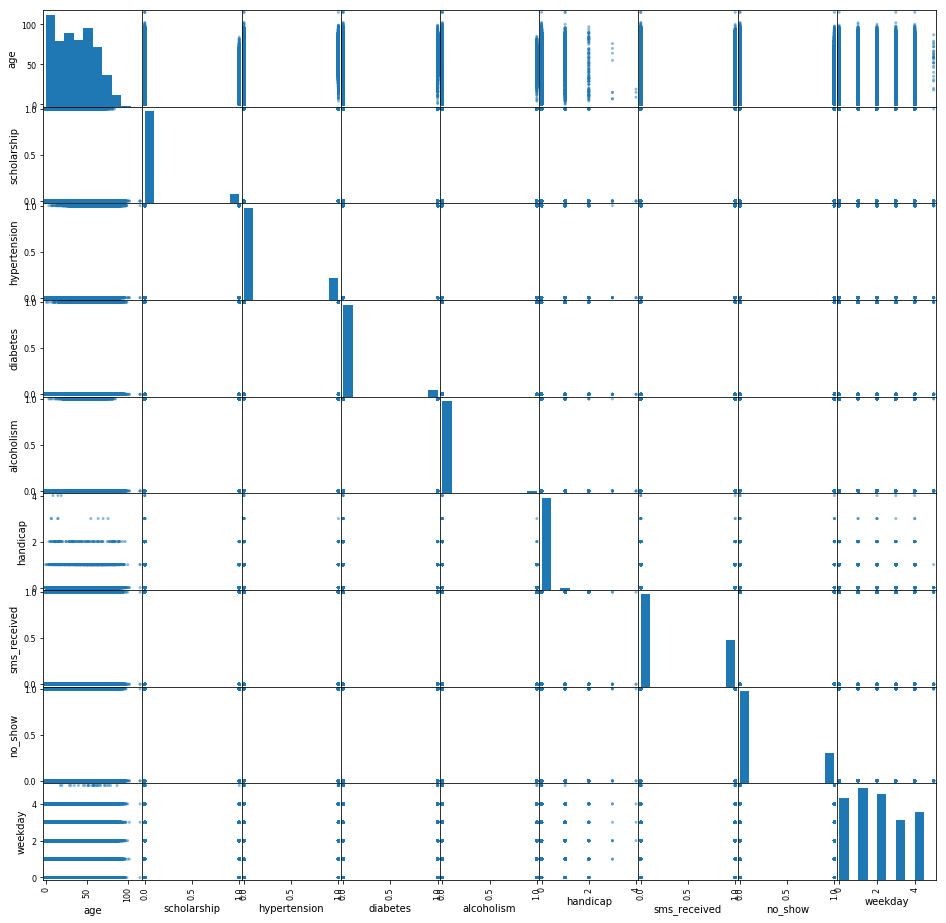

In [28]:
pd.plotting.scatter_matrix(df, figsize = (16,16));

### Research Question 1 (What is the overall percentage of attendance?!

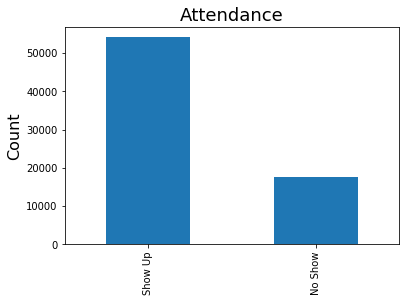

In [29]:
# Build bar chart for no show column to check attendance
df['no_show'].value_counts().plot(kind='bar')
plt.title('Attendance', fontsize=18)
plt.xticks([0, 1], ['Show Up', 'No Show'])
plt.ylabel('Count', fontsize=16);

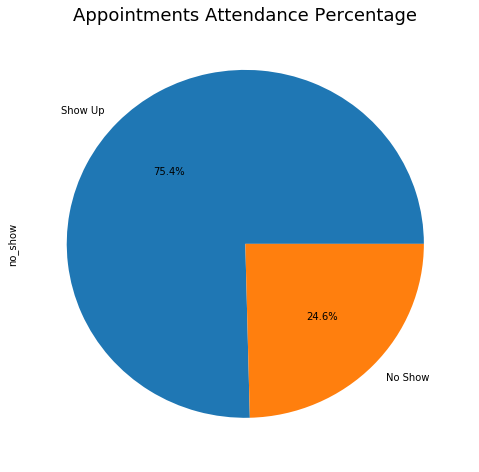

In [30]:
# Build pie chart for no show column to check percentage of attendance
df['no_show'].value_counts().plot(kind='pie', labels = ['Show Up', 'No Show'], figsize= (8,8), autopct='%1.1f%%')
plt.title('Appointments Attendance Percentage', fontsize=18);

In [31]:
df['no_show'].value_counts()

0    54153
1    17663
Name: no_show, dtype: int64

> 75.4% of pateints have showed up on their appointments.
>
> 24.6% of pateints have not showed up ontheir appointments.

precentage reference http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php#:~:text=To%20add%20percentages%20to%20each,percentage%20to%20the%20tenth%20place.&text=This%20gets%20rid%20of%20the%20tilt%20from%20the%20pie%20chart. 

### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?!)

In [32]:
show = df.no_show == 0
noshow = df.no_show == 1

In [33]:
# Define a function to build a histogram
def plot_hist(variable):
    plt.figure(figsize=[10, 8])
    df[variable][show].hist(alpha=0.5, label='show')
    df[variable][noshow].hist(alpha=0.5, label='noshow')
    plt.legend()
    plt.title('Comparison show & no-show to {}'.format(variable))
    plt.xlabel('{}'.format(variable.title()))
    plt.ylabel('Patients Number')
    

In [34]:
# Define a function to check value counts 
def value_counts(variable):
    print(df[variable][show].value_counts())
    print(df[variable][noshow].value_counts())

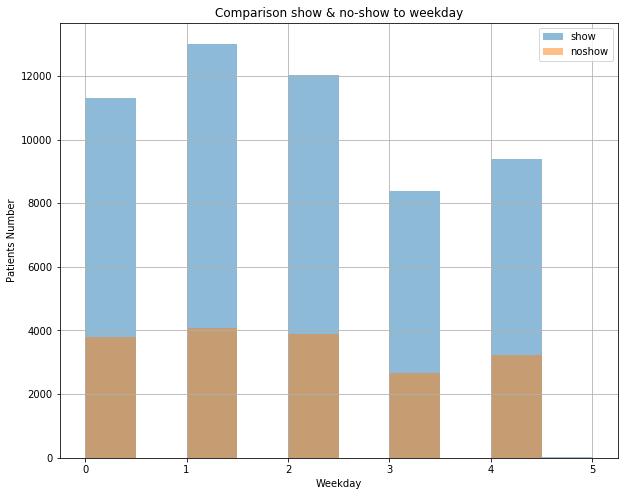

In [35]:
plot_hist('weekday')

In [36]:
value_counts('weekday')

1    13014
2    12032
0    11304
4     9383
3     8398
5       22
Name: weekday, dtype: int64
1    4075
2    3904
0    3803
4    3215
3    2660
5       6
Name: weekday, dtype: int64


Second working day is the most busy day with showed up appointments.

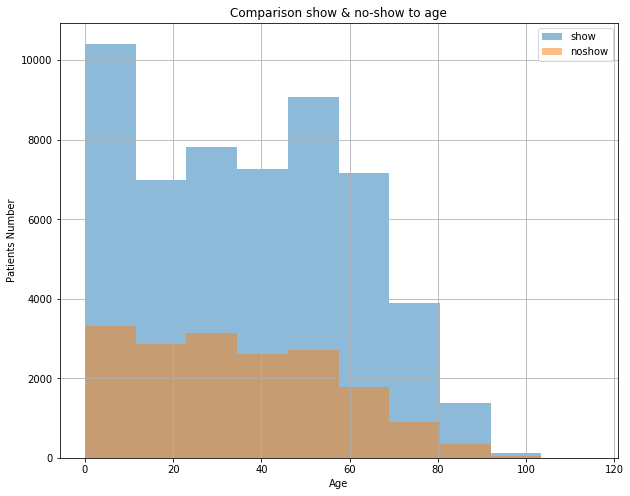

In [37]:
plot_hist('age')

Age from 0 to 10 is the most common age for attendance then from 44 to 58 and from the age of 65 and above is getting lower till the age of 85 and above is the least attendance so we can use age factor to predict if the patients will show up for their scheduled appointment.

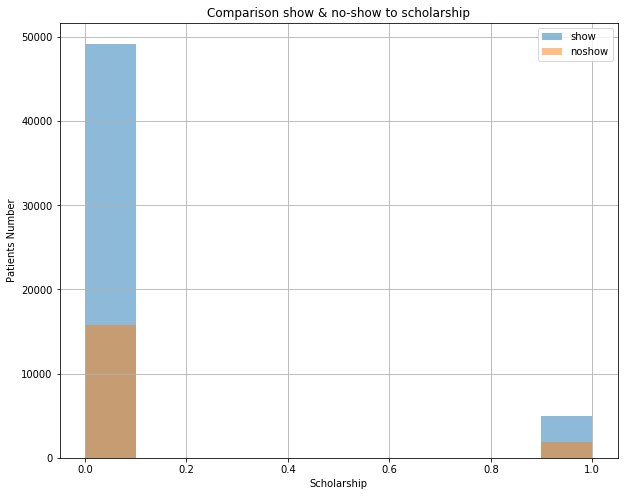

In [38]:
plot_hist('scholarship')

In [39]:
value_counts('scholarship')

0    49207
1     4946
Name: scholarship, dtype: int64
0    15748
1     1915
Name: scholarship, dtype: int64


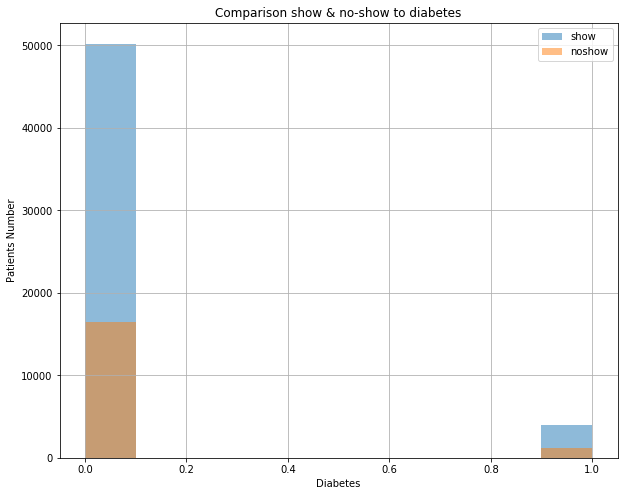

In [40]:
plot_hist('diabetes')

In [41]:
value_counts('diabetes')

0    50207
1     3946
Name: diabetes, dtype: int64
0    16513
1     1150
Name: diabetes, dtype: int64


Diabetes factor can not be used to predict if the patients will show up for their scheduled appointment as most of the patients have showed up, were not suffering from diabetes.

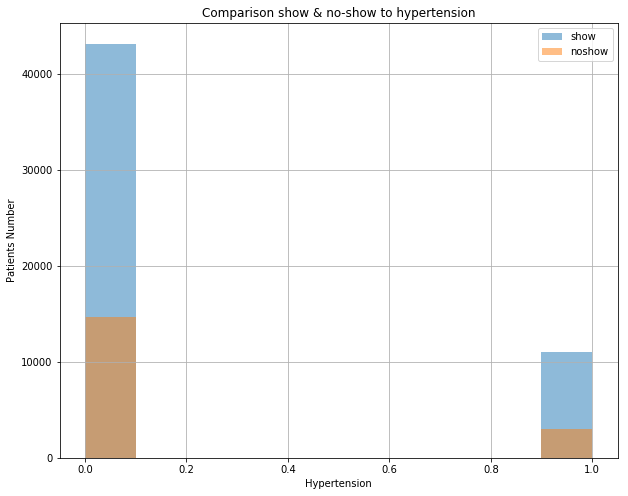

In [42]:
plot_hist('hypertension')

In [43]:
value_counts('hypertension')

0    43163
1    10990
Name: hypertension, dtype: int64
0    14644
1     3019
Name: hypertension, dtype: int64


Hypertension factor can not be used to predict if the patients will show up for their scheduled appointment as most of the patients have showed up, were not suffering from hypertension.

Scholarship factor can not be used to predict if the patients will show up for their scheduled appointment as most of the patients have showed up, have not have a scholarship.

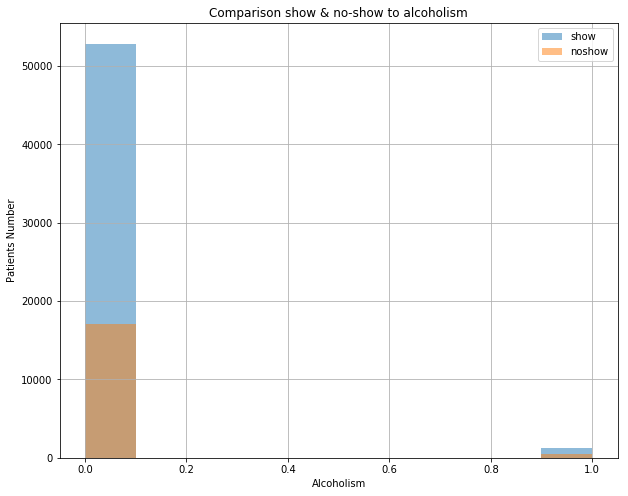

In [44]:
plot_hist('alcoholism')

In [45]:
value_counts('alcoholism')

0    52875
1     1278
Name: alcoholism, dtype: int64
0    17143
1      520
Name: alcoholism, dtype: int64


Alcoholism factor can not be used to predict if the patients will show up for their scheduled appointment as most of the patients have showed up, were not suffering from alcoholism.

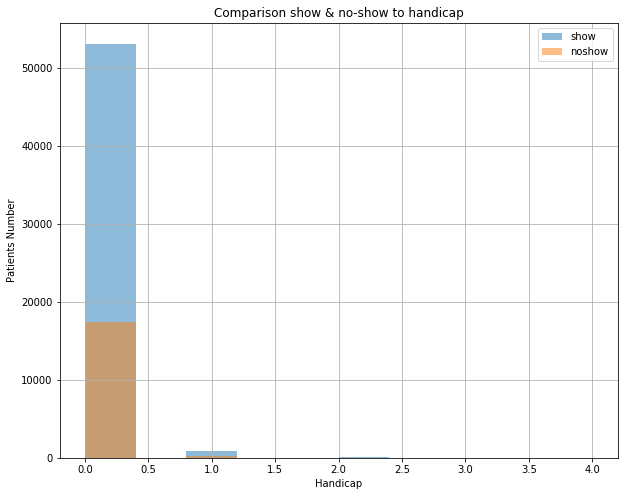

In [46]:
plot_hist('handicap')

In [47]:
value_counts('handicap')

0    53126
1      931
2       89
3        5
4        2
Name: handicap, dtype: int64
0    17385
1      247
2       27
3        3
4        1
Name: handicap, dtype: int64


Handicap factor can not be used to predict if the patients will show up for their scheduled appointment as most of the patients have showed up, were not people of determination.

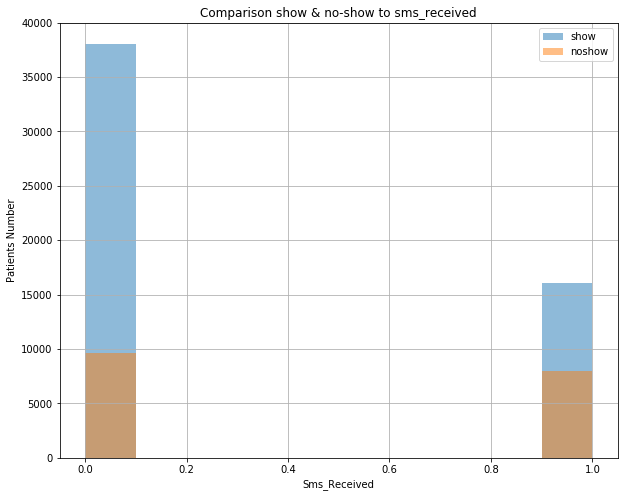

In [48]:
plot_hist('sms_received')

In [49]:
value_counts('sms_received')

0    38057
1    16096
Name: sms_received, dtype: int64
0    9660
1    8003
Name: sms_received, dtype: int64


Sms received factor can not be used to predict if the patients will show up for their scheduled appointment as most of the patients who have showed up, they have not received sms.

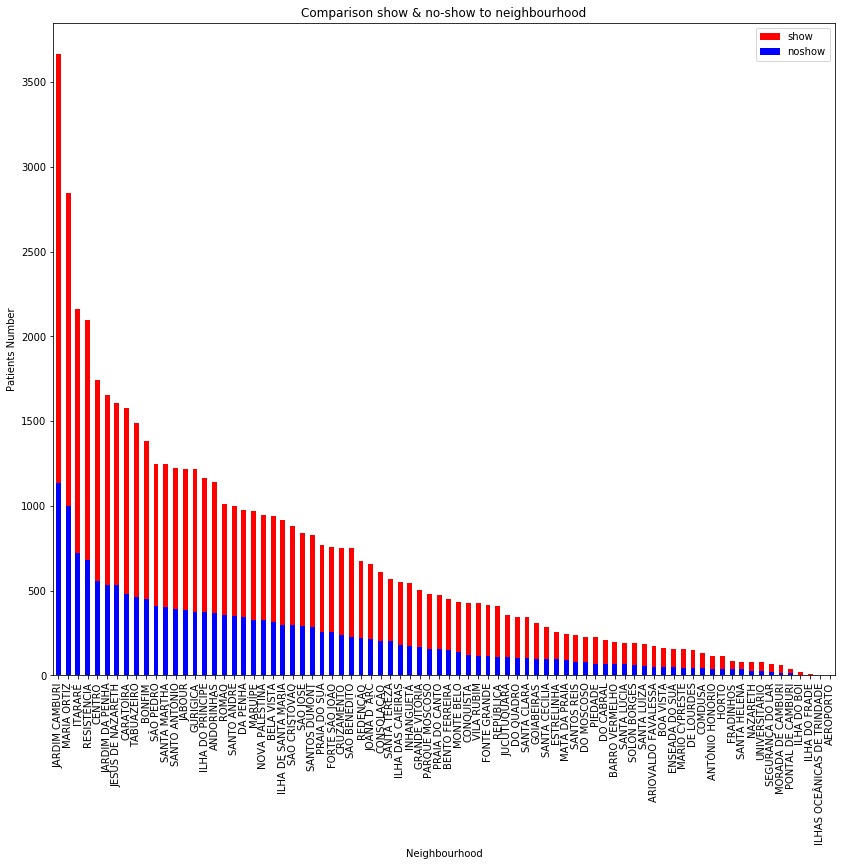

In [50]:
# Create bar chart to check neighbourhood citys attendance
plt.figure(figsize=[14, 12])
df.neighbourhood[show].value_counts().plot(kind='bar', color='red', label='show')
df.neighbourhood[noshow].value_counts().plot(kind='bar', color='blue', label='noshow')
plt.legend()
plt.title('Comparison show & no-show to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');
    

Neighbourhood factor is strongly recommended used to predict if the patients will show up for their scheduled appointment.

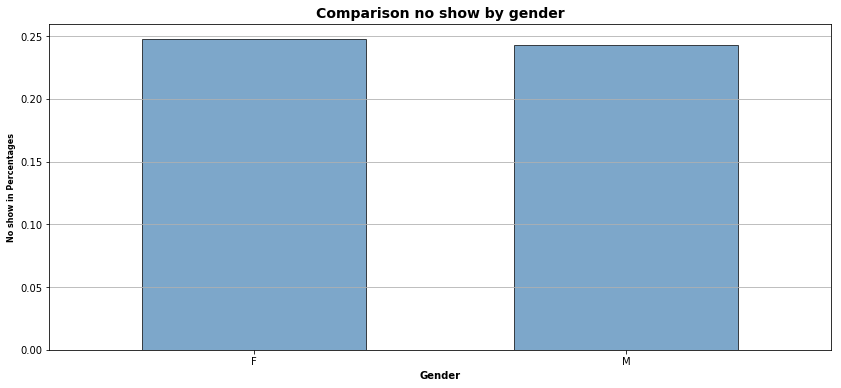

In [51]:
# Build a groupby plot to check quanitative variable attendance

df.groupby(['gender'])['no_show'].mean().plot.bar(edgecolor='black', figsize=(14, 6), rot=0, width=0.6, color='steelblue', alpha=0.7)
plt.title('Comparison no show by gender', fontsize = 14, weight = "bold")
plt.xlabel('Gender', fontsize =10, weight = "bold")
plt.ylabel('No show in Percentages', fontsize = 8, weight='bold')
plt.grid(axis='y')

Gender factor can not be used to predict if the patients will show up for their scheduled appointment as proportions are very close.

<a id='conclusions'></a>
## Conclusions

> Around 75 persent of patient have showed up and 25 percent have not.

> Age and neighbourhood factors are recommended to use to predict whether the patient will show up or not.

> Second working day of the week is the most preferable day for attendance.

> Sms toll used might has ab issue as most of the patient who showed up did not receive sms.

> limitation: 
>> Apointment timing was not given so we could not check which hour has the most appointment show up number of patient and which hour is the least.
>>
>> Correlation between factors such as hypertension, diabetes, alcoholism and gender and the patient status was not detected.




In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0